In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
movies_data = pd.read_csv(r'Downloads/movies.csv')

In [3]:
movies_data.head()

index     budget                                    genres  \
0      0  237000000  Action Adventure Fantasy Science Fiction   
1      1  300000000                  Adventure Fantasy Action   
2      2  245000000                    Action Adventure Crime   
3      3  250000000               Action Crime Drama Thriller   
4      4  260000000          Action Adventure Science Fiction   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  culture clash future space war space colony so...                en   
1  ocean drug abuse exotic island east india trad...                en   
2         spy based on novel secret agent sequel mi6                en   
3  dc comics crime fighter terrorist secret ident...                en   
4  based on novel mars medallion space travel pri...                en   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   
3                     The Dark Knight Rises   
4                               John Carter   

                                            overview  popularity  ... runtime  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577  ...   162.0   
1  Captain Barbossa, long believed to be dead, ha...  139.082615  ...   169.0   
2  A cryptic message from Bond’s past sends him o...  107.376788  ...   148.0   
3  Following the death of District Attorney Harve...  112.312950  ...   165.0   
4  John Carter is a war-weary, former military ca...   43.926995  ...   132.0   

                                    spoken_languages    status  \
0  [{"iso_639_1": "en", "name": "English"}, {"iso...  Released   
1           [{"iso_639_1": "en", "name": "English"}]  Released   
2  [{"iso_639_1": "fr", "name": "Fran\u00e7ais"},...  Released   
3           [{"iso_639_1": "en", "name": "English"}]  Released   
4           [{"iso_639_1": "en", "name": "English"}]  Released   

                                          tagline  \
0                     Enter the World of Pandora.   
1  At the end of the world, the adventure begins.   
2                           A Plan No One Escapes   
3                                 The Legend Ends   
4            Lost in our world, found in another.   

                                      title vote_average vote_count  \
0                                    Avatar          7.2      11800   
1  Pirates of the Caribbean: At World's End          6.9       4500   
2                                   Spectre          6.3       4466   
3                     The Dark Knight Rises          7.6       9106   
4                               John Carter          6.1       2124   

                                                cast  \
0  Sam Worthington Zoe Saldana Sigourney Weaver S...   
1  Johnny Depp Orlando Bloom Keira Knightley Stel...   
2  Daniel Craig Christoph Waltz L\u00e9a Seydoux ...   
3  Christian Bale Michael Caine Gary Oldman Anne ...   
4  Taylor Kitsch Lynn Collins Samantha Morton Wil...   

                                                crew           director  
0  [{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...      James Cameron  
1  [{'name': 'Dariusz Wolski', 'gender': 2, 'depa...     Gore Verbinski  
2  [{'name': 'Thomas Newman', 'gender': 2, 'depar...         Sam Mendes  
3  [{'name': 'Hans Zimmer', 'gender': 2, 'departm...  Christopher Nolan  
4  [{'name': 'Andrew Stanton', 'gender': 2, 'depa...     Andrew Stanton  

[5 rows x 24 columns]

In [4]:
selected_features = ['genres','keywords','tagline','cast','director']
print(selected_features)

['genres', 'keywords', 'tagline', 'cast', 'director']


In [5]:
for feature in selected_features:
    movies_data[feature] = movies_data[feature].fillna('')

In [6]:
combined_features = movies_data['genres']+' '+movies_data['keywords']+' '+movies_data['tagline']+' '+movies_data['cast']+' '+movies_data['director']

In [7]:
print(combined_features)

0       Action Adventure Fantasy Science Fiction cultu...
1       Adventure Fantasy Action ocean drug abuse exot...
2       Action Adventure Crime spy based on novel secr...
3       Action Crime Drama Thriller dc comics crime fi...
4       Action Adventure Science Fiction based on nove...
                              ...                        
4798    Action Crime Thriller united states\u2013mexic...
4799    Comedy Romance  A newlywed couple's honeymoon ...
4800    Comedy Drama Romance TV Movie date love at fir...
4801      A New Yorker in Shanghai Daniel Henney Eliza...
4802    Documentary obsession camcorder crush dream gi...
Length: 4803, dtype: object


In [8]:
vectorizer = TfidfVectorizer()

In [9]:
feature_vectors = vectorizer.fit_transform(combined_features)

In [10]:
print(feature_vectors)

  (0, 2432)	0.17272411194153
  (0, 7755)	0.1128035714854756
  (0, 13024)	0.1942362060108871
  (0, 10229)	0.16058685400095302
  (0, 8756)	0.22709015857011816
  (0, 14608)	0.15150672398763912
  (0, 16668)	0.19843263965100372
  (0, 14064)	0.20596090415084142
  (0, 13319)	0.2177470539412484
  (0, 17290)	0.20197912553916567
  (0, 17007)	0.23643326319898797
  (0, 13349)	0.15021264094167086
  (0, 11503)	0.27211310056983656
  (0, 11192)	0.09049319826481456
  (0, 16998)	0.1282126322850579
  (0, 15261)	0.07095833561276566
  (0, 4945)	0.24025852494110758
  (0, 14271)	0.21392179219912877
  (0, 3225)	0.24960162956997736
  (0, 16587)	0.12549432354918996
  (0, 14378)	0.33962752210959823
  (0, 5836)	0.1646750903586285
  (0, 3065)	0.22208377802661425
  (0, 3678)	0.21392179219912877
  (0, 5437)	0.1036413987316636
  :	:
  (4801, 17266)	0.2886098184932947
  (4801, 4835)	0.24713765026963996
  (4801, 403)	0.17727585190343226
  (4801, 6935)	0.2886098184932947
  (4801, 11663)	0.21557500762727902
  (4801, 1672

In [11]:
similarity = cosine_similarity(feature_vectors)

In [12]:
print(similarity)

[[1.         0.07219487 0.037733   ... 0.         0.         0.        ]
 [0.07219487 1.         0.03281499 ... 0.03575545 0.         0.        ]
 [0.037733   0.03281499 1.         ... 0.         0.05389661 0.        ]
 ...
 [0.         0.03575545 0.         ... 1.         0.         0.02651502]
 [0.         0.         0.05389661 ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.02651502 0.         1.        ]]


In [13]:
marvel_movies = movies_data[movies_data['keywords'].str.contains('marvel', case=False)]


top_marvel_movies = marvel_movies[['title','keywords']].head(10)


pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', None)

print(top_marvel_movies)

                         title                                                               keywords
7      Avengers: Age of Ultron               marvel comic sequel superhero based on comic book vision
16                The Avengers             new york shield marvel comic superhero based on comic book
20      The Amazing Spider-Man      loss of father vigilante serum marvel comic scientific experiment
26  Captain America: Civil War                            civil war war marvel comic sequel superhero
30                Spider-Man 2         dual identity love of one's life pizza boy marvel comic sequel
31                  Iron Man 3                  terrorist war on terror tennessee malibu marvel comic
33       X-Men: The Last Stand               mutant marvel comic based on comic book superhuman beast
38    The Amazing Spider-Man 2        obsession marvel comic sequel based on comic book electrocution
46  X-Men: Days of Future Past              1970s mutant time travel marvel comic 

# 1). Find out the list of most popular and liked genre

In [14]:
df1=movies_data.groupby(['genres'])[['vote_average']].sum()
high_rated=df1.nlargest(20,'vote_average')

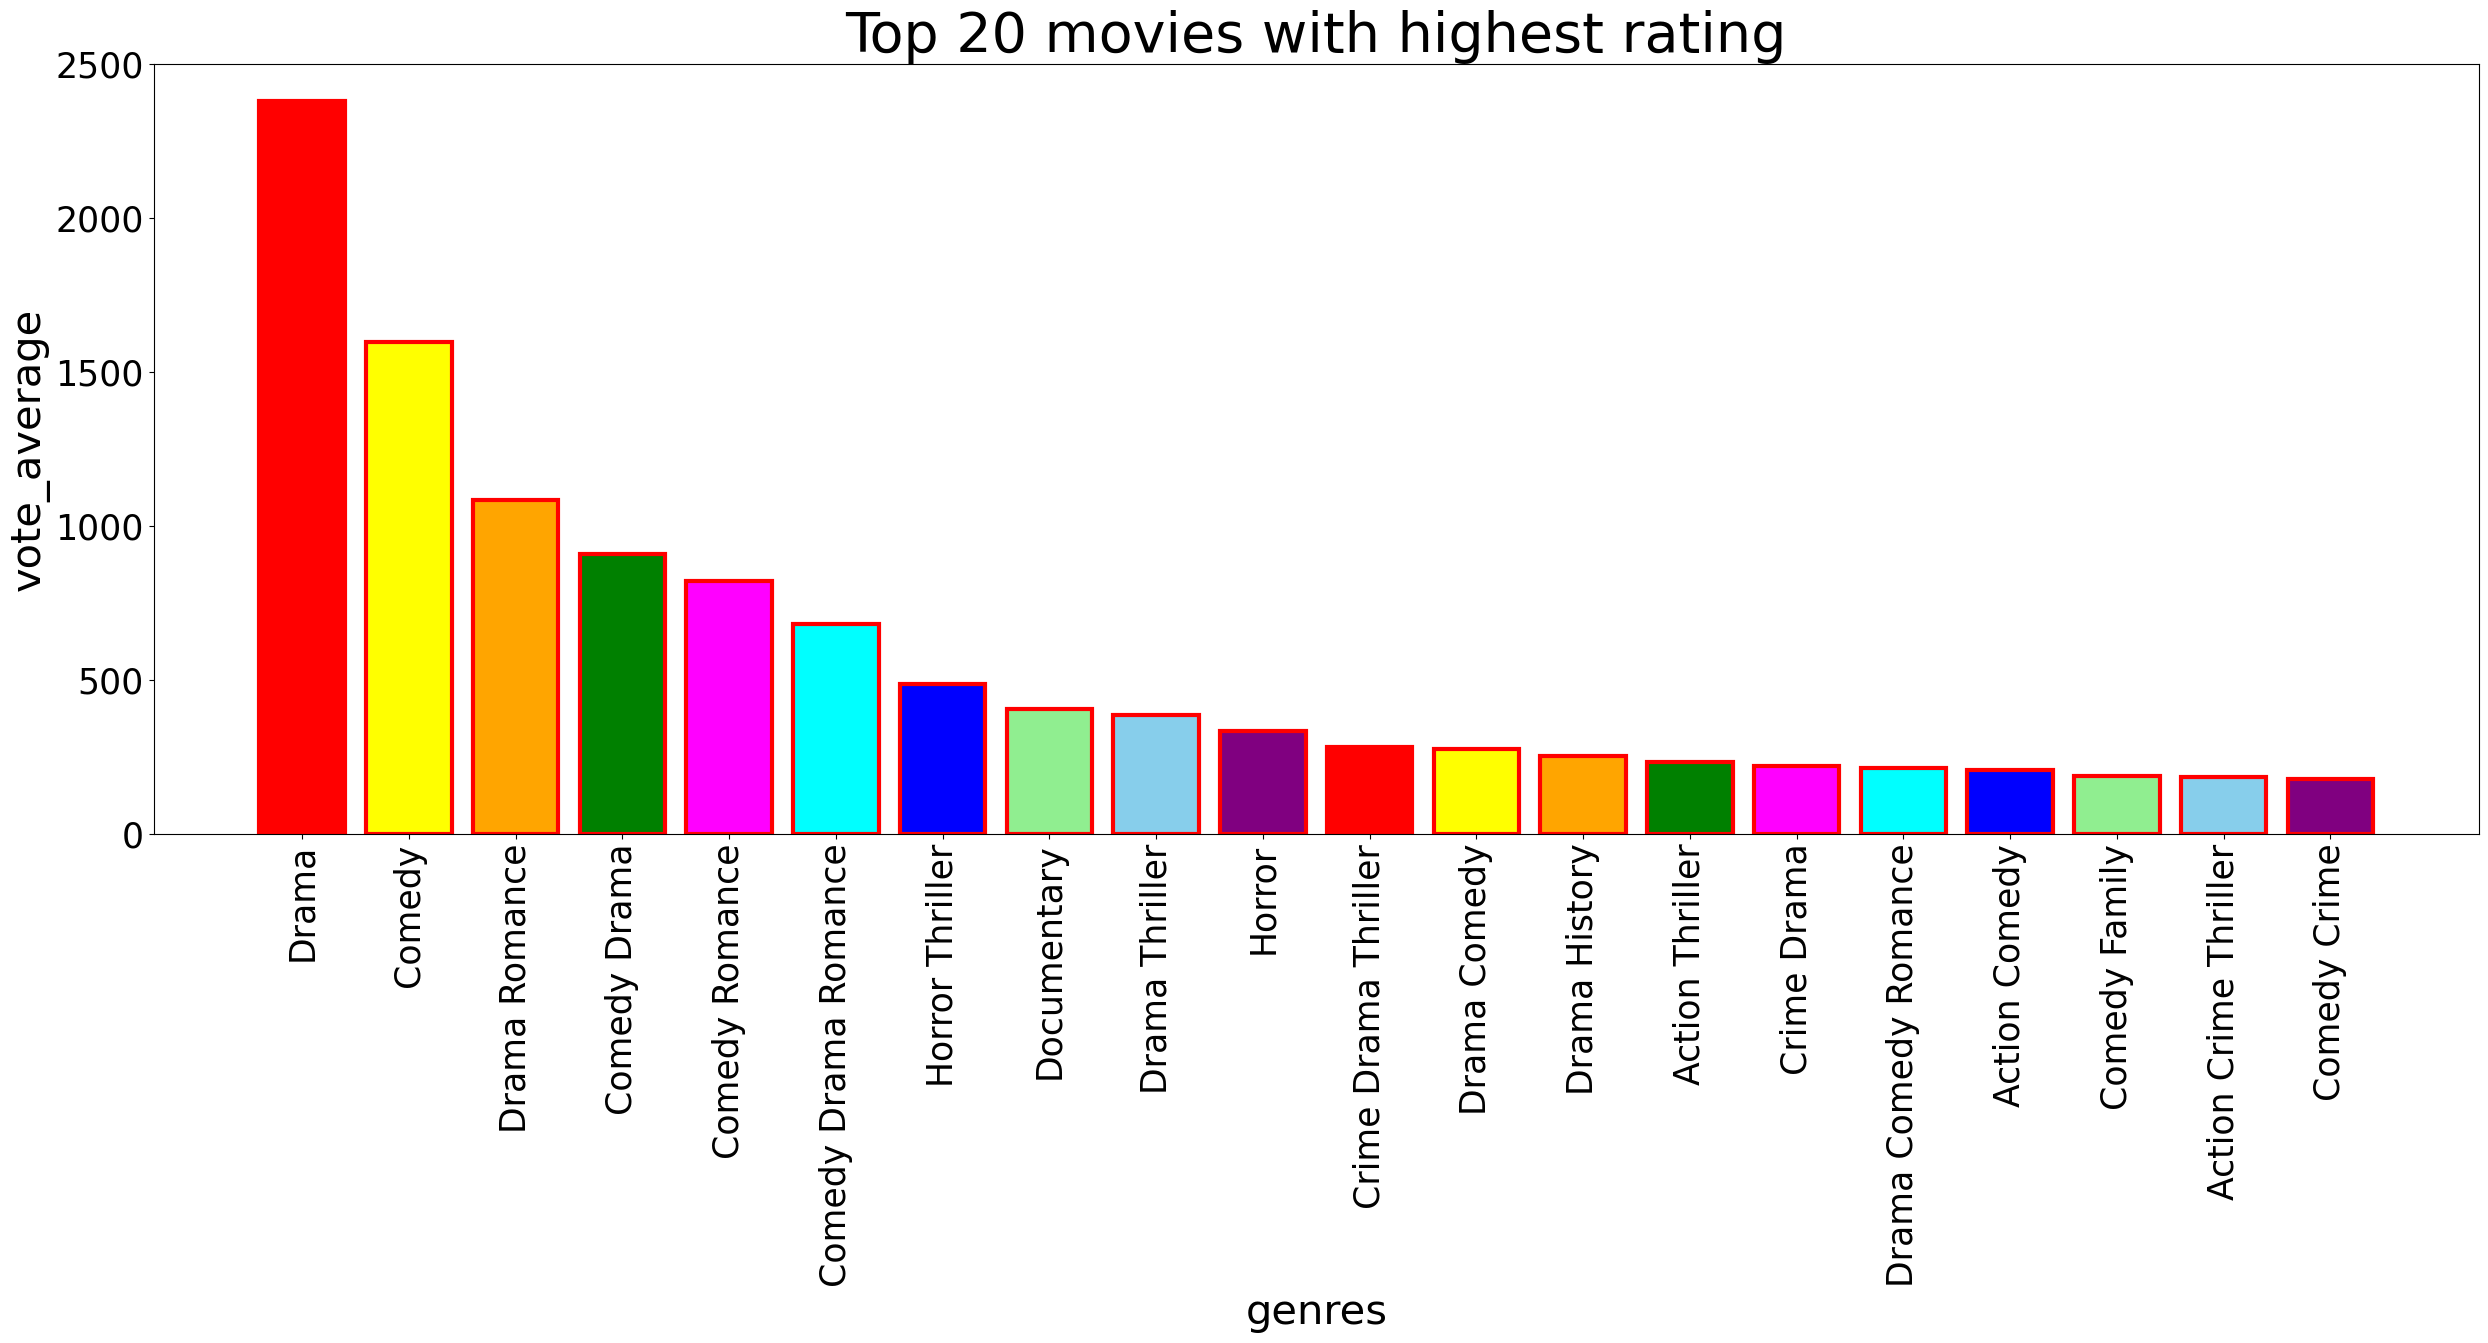

In [15]:
plt.figure(figsize=(30,10))
plt.title('Top 20 movies with highest rating',fontsize=40)
colors=['red','yellow','orange','green','magenta','cyan','blue','lightgreen','skyblue','purple']
plt.ylabel('vote_average',fontsize=30)
plt.xticks(fontsize=25,rotation=90)
plt.xlabel('genres',fontsize=30)
plt.yticks(fontsize=25)
plt.bar(high_rated.index,high_rated['vote_average'],linewidth=3,edgecolor='red',color=colors)
plt.show()

# 1). Drama genre is most liked genres. 

In [16]:

sorted_movies = movies_data.sort_values(by='vote_average', ascending=False)


top_rated_movies = sorted_movies[['title','vote_average']].head(10)


pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', None)

print(top_rated_movies)

                         title  vote_average
3519          Stiff Upper Lips          10.0
4247     Me You and Five Bucks          10.0
4045     Dancer, Texas Pop. 81          10.0
4662            Little Big Top          10.0
3992                 Sardaarji           9.5
2386            One Man's Hero           9.3
2970        There Goes My Baby           8.5
1881  The Shawshank Redemption           8.5
2796     The Prisoner of Zenda           8.4
3337             The Godfather           8.4


In [17]:
# Sort the movies_data DataFrame by 'budget' in descending order
sorted_movies = movies_data.sort_values(by='budget', ascending=False)

# Get the top 20 rows of the sorted DataFrame
top_budget_movies = sorted_movies[['title','budget']].head(20)

#display the DataFrame in a neat and organized table
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', None)

print(top_budget_movies)

                                          title     budget
17  Pirates of the Caribbean: On Stranger Tides  380000000
1      Pirates of the Caribbean: At World's End  300000000
7                       Avengers: Age of Ultron  280000000
10                             Superman Returns  270000000
4                                   John Carter  260000000
6                                       Tangled  260000000
5                                  Spider-Man 3  258000000
13                              The Lone Ranger  255000000
46                   X-Men: Days of Future Past  250000000
22          The Hobbit: The Desolation of Smaug  250000000
26                   Captain America: Civil War  250000000
9            Batman v Superman: Dawn of Justice  250000000
98            The Hobbit: An Unexpected Journey  250000000
19    The Hobbit: The Battle of the Five Armies  250000000
8        Harry Potter and the Half-Blood Prince  250000000
3                         The Dark Knight Rises  2500000

In [18]:
sorted_moviess = movies_data.sort_values(by='vote_average', ascending=True)

# best suited Movie  in every genre.

In [19]:
if 'vote_average' in movies_data.columns:
    
    sorted_movies = sorted_movies[['title', 'genres', 'vote_average']]
    
    sorted_movies.sort_values(by='vote_average',ascending=False,inplace=True)
   
    top_30_movies = sorted_movies.head(30)

else:
    print("'vote_average' column not found in the original DataFrame.")

print(top_30_movies)

                                     title                              genres  vote_average
4045                 Dancer, Texas Pop. 81                 Comedy Drama Family          10.0
4247                 Me You and Five Bucks                Romance Comedy Drama          10.0
3519                      Stiff Upper Lips                              Comedy          10.0
4662                        Little Big Top                              Comedy          10.0
3992                             Sardaarji                                               9.5
2386                        One Man's Hero        Western Action Drama History           9.3
1881              The Shawshank Redemption                         Drama Crime           8.5
2970                    There Goes My Baby                        Drama Comedy           8.5
3337                         The Godfather                         Drama Crime           8.4
2796                 The Prisoner of Zenda             Adventure Drama

# 3). Comedy crime genres is worst rating.